In [1]:
import sys
import os

thesis_path = "/" + os.path.join(
    *os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)


In [2]:
from evaluations.performance_01 import get_per_sample_metrics
from evaluations.utils import get_correct_latex_format
metrics_df = get_per_sample_metrics()

/home/loebbert/miniconda3/envs/flair/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/loebbert/miniconda3/envs/flair/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/loebbert/miniconda3/envs/flair/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and

In [3]:
metrics_df.head()

,seed,model,checkpoint,dataset,doc_id,targets,entity_type,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
0,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,location,0,0,0,0,0,0,0,0
1,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,group,0,0,0,0,0,0,0,0
2,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,corporation,0,0,0,0,0,0,0,0
3,2,t5_asp_sent,last,lowner_test,lowner_test_0,2,person,2,0,0,0,0,0,0,0
4,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,creative-work,0,0,0,0,0,0,0,0


In [4]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49037400 entries, 0 to 49037399
Data columns (total 15 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   seed         object
 1   model        object
 2   checkpoint   object
 3   dataset      object
 4   doc_id       object
 5   targets      int64 
 6   entity_type  object
 7   tp           int64 
 8   fn           int64 
 9   fp           int64 
 10  error_type1  int64 
 11  error_type2  int64 
 12  error_type3  int64 
 13  error_type4  int64 
 14  error_type5  int64 
dtypes: int64(9), object(6)
memory usage: 5.5+ GB


In [5]:
metrics_df.describe()

,targets,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
count,4.903740e+07,4.903740e+07,4.903740e+07,4.903740e+07,4.903740e+07,4.903740e+07,4.903740e+07,4.903740e+07,4.903740e+07
mean,2.161282e-01,1.607247e-01,5.540347e-02,2.272748e-01,2.041715e-01,3.550602e-02,5.925396e-03,7.724186e-03,9.569859e-03
std,5.983969e-01,5.140097e-01,2.805685e-01,8.282391e-01,7.986944e-01,2.298007e-01,8.054301e-02,9.558761e-02,1.098896e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,1.200000e+01,1.200000e+01,2.300000e+01,2.300000e+01,1.200000e+01,7.000000e+00,7.000000e+00,1.100000e+01


# Model performance
## Macro-F1 + 5 Error Types avg+std

In [6]:
# Macro - F1
from evaluations.performance_01 import get_micro_f1_precision_recall
result = get_micro_f1_precision_recall(metrics_df, "last", "lowner_test")
result

model checkpoint      dataset         f1            \
                                                               mean       std   
4                 dict_match_gaz       last  lowner_test  28.573637  0.007001   
10           dict_match_gaz_sent       last  lowner_test  29.404060  0.045085   
16          dict_match_lownergaz       last  lowner_test  20.773579  0.019751   
22      dict_match_lownergaz_gaz       last  lowner_test  20.939858  0.014720   
28     dict_match_lownergaz_sent       last  lowner_test  21.611711  0.012736   
34               dict_match_sent       last  lowner_test  29.028146  0.009593   
40                         flair       last  lowner_test  81.137520  0.244803   
46                     flair_gaz       last  lowner_test  84.991991  0.175143   
52                flair_gaz_sent       last  lowner_test  87.067682  0.049821   
58               flair_lownergaz       last  lowner_test  87.581465  0.248030   
64           flair_lownergaz_gaz       last  lowner_test  87.606730  0.282894   
70          flair_lownergaz_sent       last  lowner_test  88.561098  0.207337   
76                 flair_roberta       last  lowner_test  84.064658  0.110460   
82                    flair_sent       last  lowner_test  85.127978  0.202967   
88              search_match_gaz       last  lowner_test  37.168811  0.018344   
94         search_match_gaz_sent       last  lowner_test  43.204888  0.007487   
100       search_match_lownergaz       last  lowner_test  50.238465  0.039870   
106   search_match_lownergaz_gaz       last  lowner_test  50.685264  0.058839   
112  search_match_lownergaz_sent       last  lowner_test  59.462562  0.010283   
118            search_match_sent       last  lowner_test  37.173665  0.012268   
124                       t5_asp       last  lowner_test  85.481521  0.163211   
130                   t5_asp_gaz       last  lowner_test  86.515093  1.373751   
136              t5_asp_gaz_sent       last  lowner_test  88.478024  0.122478   
142             t5_asp_lownergaz       last  lowner_test  87.478254  2.444407   
148         t5_asp_lownergaz_gaz       last  lowner_test  87.807060  2.371007   
154        t5_asp_lownergaz_sent       last  lowner_test  89.600103  0.029477   
160                  t5_asp_sent       last  lowner_test  86.724683  0.218033   

     precision               recall            
          mean       std       mean       std  
4    20.357842  0.004988  47.907707  0.011738  
10   20.949493  0.032122  49.300027  0.075591  
16   11.898689  0.011313  81.744289  0.077719  
22   11.991529  0.008430  82.512124  0.058005  
28   12.376276  0.007294  85.159514  0.050186  
34   20.691513  0.006838  48.615305  0.016067  
40   79.432884  0.296455  82.917010  0.196205  
46   82.939573  0.300023  87.148870  0.041365  
52   85.992322  0.270974  88.171379  0.267461  
58   86.507934  0.315866  88.682252  0.239328  
64   86.184735  0.578284  89.077988  0.082169  
70   87.716943  0.144753  89.421875  0.308263  
76   82.972975  0.316572  85.186202  0.112832  
82   84.335491  0.256101  85.935737  0.214517  
88   35.845302  0.017691  38.593802  0.019047  
94   44.003764  0.007625  42.434501  0.007353  
100  44.944334  0.035669  56.946351  0.045194  
106  45.883625  0.053265  56.609327  0.065716  
112  59.281405  0.010252  59.644829  0.010315  
118  78.615051  0.025945  24.341965  0.008033  
124  86.982432  0.295482  84.031781  0.061052  
130  88.825027  0.325854  84.359655  2.830382  
136  89.540748  0.150150  87.440906  0.310630  
142  90.383760  0.077121  84.831641  4.507486  
148  90.725279  0.126027  85.141977  4.347731  
154  90.848639  0.268918  88.386403  0.255862  
160  88.775777  0.208632  84.766828  0.357262

In [7]:
print(get_correct_latex_format(result, ["f1", "precision", "recall"], {"f1": "Micro-F1", "precision": "Precision", "recall": "Recall"}))

KeyError: 'flair_lownergaz_sent'

In [ ]:
from evaluations.performance_01 import get_recall

get_recall(metrics_df, "last", "lowner_test").sort_values(("recall", "mean"),
                                                          ascending=False)


model checkpoint      dataset     recall          
                                                               mean       std
112        t5_asp_lownergaz_sent       last  lowner_test  88.386403  0.255862
94               t5_asp_gaz_sent       last  lowner_test  87.440906  0.310630
40                 flair_roberta       last  lowner_test  85.186202  0.112832
28     dict_match_lownergaz_sent       last  lowner_test  85.159514  0.050186
100             t5_asp_lownergaz       last  lowner_test  84.831641  4.507486
118                  t5_asp_sent       last  lowner_test  84.766828  0.357262
88                    t5_asp_gaz       last  lowner_test  84.359655  2.830382
82                        t5_asp       last  lowner_test  84.031781  0.061052
22      dict_match_lownergaz_gaz       last  lowner_test  82.512124  0.058005
16          dict_match_lownergaz       last  lowner_test  81.744289  0.077719
106         t5_asp_lownergaz_gaz       last  lowner_test  79.807546  0.182058
70   search_match_lownergaz_sent       last  lowner_test  59.644829  0.010315
58        search_match_lownergaz       last  lowner_test  56.947876  0.043961
64    search_match_lownergaz_gaz       last  lowner_test  56.609327  0.065716
10           dict_match_gaz_sent       last  lowner_test  49.300027  0.075591
34               dict_match_sent       last  lowner_test  48.615305  0.016067
4                 dict_match_gaz       last  lowner_test  47.907707  0.011738
52         search_match_gaz_sent       last  lowner_test  42.421539  0.019544
46              search_match_gaz       last  lowner_test  38.593802  0.019047
76             search_match_sent       last  lowner_test  24.351877  0.002641

In [ ]:
# 5 Error types
from evaluations.performance_01 import get_error_types
error_result = get_error_types(metrics_df, "last", "lowner_test")
print(get_correct_latex_format(error_result, [
    "error_type1",
    "error_type2",
    "error_type3",
    "error_type4",
    "error_type5",
    "sum"
                                              ], {
    "error_type1": "Type-1",
    "error_type2": "Type-2",
    "error_type3": "Type-3",
    "error_type4": "Type-4",
    "error_type5": "Type-5",
    "sum": "Sum"
                                              }))

\begin{tabular}{lllllll}
\toprule
{} &            Type-1 &             Type-2 &           Type-3 &           Type-4 &           Type-5 &                Sum \\
\textbf{Models                                   } &                   &                    &                  &                  &                  &                    \\
\midrule
\textbf{FLAIR\textsubscript{XLM-RoBERTa-Large}   } &  2,933.67 (10335) &   2,118.00 (11268) &  1,527.00 (2563) &    683.00 (2685) &  2,550.67 (3317) &    9,812.33 (8082) \\
\textbf{T5-ASP                                   } &   1,652.67 (7151) &    3,078.00 (6031) &   1,595.00 (458) &    492.00 (1637) &  1,840.67 (5652) &   8,658.33 (10433) \\
\textbf{DictMatch\textsubscript{Gaz}             } &     68,177.00 (0) &      11,740.00 (0) &   1,802.67 (513) &  7,315.67 (1804) &  4,639.33 (1804) &    93,674.67 (513) \\
\textbf{DictMatch\textsubscript{Sent}            } &     68,148.00 (0) &      11,926.00 (0) &   1,149.33 (702) &  7,287.00 (1873) &  4,877.0

/home/loebbert/projects/thesis/evaluations/utils.py:378: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


## Macro F1 + errors by entity type

In [ ]:
from evaluations.performance_01 import get_f1_per_entity

entity_results = get_f1_per_entity(metrics_df, "last", "lowner_test")


In [ ]:
print(get_correct_latex_format(entity_results.swaplevel(1, 2, axis=1), ["corporation", "creative-work", "group", "location", "person", "product"], {"f1": "Micro-F1"}))

\begin{tabular}{lllllll}
\toprule
{} &       Person &    Location &        Group &  Corporation & Creative Work &      Product \\
\textbf{Models                                   } &              &             &              &              &               &              \\
\midrule
\textbf{FLAIR\textsubscript{XLM-RoBERTa-Large}   } &   91.64 (26) &  89.35 (10) &   78.79 (17) &   70.74 (43) &     67.00 (6) &   50.64 (97) \\
\textbf{T5-ASP                                   } &    94.28 (3) &  87.93 (27) &   79.99 (17) &   75.11 (46) &    71.65 (10) &   44.78 (52) \\
\textbf{DictMatch\textsubscript{Gaz}             } &    44.63 (8) &   42.66 (8) &    35.73 (3) &    32.69 (8) &      8.59 (3) &   15.58 (10) \\
\textbf{DictMatch\textsubscript{Sent}            } &    43.49 (8) &   44.13 (7) &    36.67 (8) &   33.02 (10) &      8.49 (3) &    15.52 (1) \\
\textbf{DictMatch\textsubscript{LownerGaz}       } &    50.06 (8) &   25.55 (8) &   26.29 (10) &   33.65 (18) &      5.54 (0) &   15.90 (22) 

/home/loebbert/projects/thesis/evaluations/utils.py:378: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [ ]:
from evaluations.performance_01 import get_error_types_per_entity

get_error_types_per_entity(metrics_df, "last", "lowner_test")

entity_type                        model checkpoint      dataset  corporation  \
                                                                         mean   
                                                                  error_type1   
4                         dict_match_gaz       last  lowner_test  3797.000000   
10                   dict_match_gaz_sent       last  lowner_test  3788.666667   
16                  dict_match_lownergaz       last  lowner_test  4880.333333   
22              dict_match_lownergaz_gaz       last  lowner_test  5142.666667   
28             dict_match_lownergaz_sent       last  lowner_test  5351.000000   
34                       dict_match_sent       last  lowner_test  3772.333333   
40                         flair_roberta       last  lowner_test   119.000000   
46                      search_match_gaz       last  lowner_test  1445.666667   
52                 search_match_gaz_sent       last  lowner_test  1135.333333   
58                search_match_lownergaz       last  lowner_test   717.333333   
64            search_match_lownergaz_gaz       last  lowner_test   764.333333   
70           search_match_lownergaz_sent       last  lowner_test   490.666667   
76                     search_match_sent       last  lowner_test   122.333333   
82                                t5_asp       last  lowner_test    75.333333   
88                            t5_asp_gaz       last  lowner_test    89.000000   
94                       t5_asp_gaz_sent       last  lowner_test    86.333333   
100                     t5_asp_lownergaz       last  lowner_test    81.000000   
106                 t5_asp_lownergaz_gaz       last  lowner_test    74.000000   
112                t5_asp_lownergaz_sent       last  lowner_test    87.000000   
118                          t5_asp_sent       last  lowner_test    76.000000   

entity_type              creative-work                     group              \
                    std           mean         std          mean         std   
            error_type1    error_type1 error_type1   error_type1 error_type1   
4             13.076697   37150.333333   44.736264   8623.000000   14.730920   
10             0.577350   37157.333333   51.189192   8352.333333    4.509250   
16            17.502381  129411.333333   89.946280  25047.000000  123.503036   
22            28.112868  129767.333333  278.943244  25689.000000  116.258333   
28            34.394767  129344.333333  324.731171  25728.666667   36.115555   
34            25.324560   37196.666667   45.566801   8268.000000   29.444864   
40             8.185353     819.333333   36.828431    387.000000   10.816654   
46            10.503968   12905.333333   14.189198   3111.333333   19.502137   
52             6.429101    9783.333333   13.576941   2347.666667   15.631165   
58            23.755701   15739.000000   17.349352   3226.333333   41.621309   
64            14.468356   14938.000000   27.622455   3148.000000    7.810250   
70             8.504901    8607.333333   11.590226   1807.333333    8.386497   
76             0.577350     479.333333    2.081666    168.666667    0.577350   
82             4.725816     415.000000   15.132746    233.000000    8.660254   
88            16.703293     411.333333   60.706946    218.000000   26.907248   
94             6.350853     458.666667   52.785730    216.333333   25.813433   
100            7.211103     377.666667   53.425961    185.666667   21.594752   
106            6.082763     323.333333   13.868429    169.000000    6.557439   
112            2.645751     385.333333   15.567059    186.666667   23.158872   
118            3.464102     396.666667   30.353473    191.333333   20.599353   

entity_type      location  ... creative-work                   group  \
                     mean  ...          mean         std        mean   
              error_type1  ...   error_type5 error_type5 error_type5   
4            11029.333333  ...   1063.333333   18.876794  565.666667   
10     

## EECR + ECR for labeled data + search results

In [ ]:
# EECR - labeled data
from evaluations.performance_01 import get_labeled_data_entity_coverage

labeled_data_eecr_df = get_labeled_data_entity_coverage()
labeled_data_eecr_df.sort_values("eecr", ascending=False)


EECR labeled data: 100%|██████████| 18/18 [00:36<00:00,  2.03s/it]


,model,dataset,eecr,ρ=1,"ρ ∈ (0.5,1)","ρ ∈ (0,0.5]",ρ=0∧C≠0,ρ=0∧C=0
10,t5_asp_lownergaz_sent,lowner_dev,0.871725,2953,359,141,43,317
9,t5_asp_lownergaz_sent,lowner_train,0.871400,10760,949,545,140,1161
11,t5_asp_lownergaz_sent,lowner_test,0.869792,24448,1765,1180,339,2807
3,t5_asp_lownergaz_gaz,lowner_train,0.849265,10760,833,661,140,1161
5,t5_asp_lownergaz_gaz,lowner_test,0.846693,24448,1596,1349,339,2807
4,t5_asp_lownergaz_gaz,lowner_dev,0.846478,2953,311,189,43,317
0,t5_asp_lownergaz,lowner_train,0.838219,10742,611,862,157,1183
2,t5_asp_lownergaz,lowner_test,0.834926,24403,1119,1790,360,2867
1,t5_asp_lownergaz,lowner_dev,0.832973,2947,215,280,46,325
14,t5_asp_gaz_sent,lowner_test,0.494687,10644,349,215,390,18941


In [ ]:
# EECR - labeled data - per sample eecr
from evaluations.performance_01 import get_labeled_data_entity_coverage_per_sample, aggregate_per_sample_eecr_metrics
from evaluations.utils import get_correct_latex_format

labeled_data_eecr_sample_df = get_labeled_data_entity_coverage_per_sample()
agg_labeled_data_eecr_sample_df = aggregate_per_sample_eecr_metrics(labeled_data_eecr_sample_df)
print(get_correct_latex_format(agg_labeled_data_eecr_sample_df[agg_labeled_data_eecr_sample_df["dataset"]=="lowner_test"], ["eecr"], {"eecr": "EECR"}, 4))

EECR labeled data per sample: 100%|██████████| 18/18 [00:15<00:00,  1.17it/s]


\begin{tabular}{ll}
\toprule
{} &           EECR \\
\textbf{Models                              } &                \\
\midrule
\textbf{T5-ASP\textsubscript{Gaz}           } &  0.3919 (4454) \\
\textbf{T5-ASP\textsubscript{Sent}          } &  0.3968 (4513) \\
\textbf{T5-ASP\textsubscript{LownerGaz}     } &  0.7056 (4105) \\
\textbf{T5-ASP\textsubscript{LownerGaz+Gaz} } &  0.7152 (4071) \\
\textbf{T5-ASP\textsubscript{Gaz+Sent}      } &  0.4027 (4525) \\
\textbf{T5-ASP\textsubscript{LownerGaz+Sent}} &  0.7330 (4083) \\
\bottomrule
\end{tabular}



/home/loebbert/projects/thesis/evaluations/utils.py:378: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [ ]:
# EECR - search results - per sample eecr
from evaluations.performance_01 import get_search_results_entity_coverage_per_sample, aggregate_per_sample_eecr_metrics

search_results_data_eecr = get_search_results_entity_coverage_per_sample()
agg_search_results_data_eecr = aggregate_per_sample_eecr_metrics(search_results_data_eecr)
print(get_correct_latex_format(agg_search_results_data_eecr[agg_search_results_data_eecr["dataset"]=="lowner_test"], ["eecr"], {"eecr": "EECR"}, 4))

\begin{tabular}{ll}
\toprule
{} &           EECR \\
\textbf{Models                              } &                \\
\midrule
\textbf{T5-ASP\textsubscript{Gaz}           } &  0.3281 (4304) \\
\textbf{T5-ASP\textsubscript{Sent}          } &  0.2045 (3748) \\
\textbf{T5-ASP\textsubscript{LownerGaz}     } &  0.5188 (4633) \\
\textbf{T5-ASP\textsubscript{LownerGaz+Gaz} } &  0.5171 (4631) \\
\textbf{T5-ASP\textsubscript{Gaz+Sent}      } &  0.3515 (4384) \\
\textbf{T5-ASP\textsubscript{LownerGaz+Sent}} &  0.5371 (4595) \\
\bottomrule
\end{tabular}



/home/loebbert/projects/thesis/evaluations/utils.py:378: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [ ]:
from evaluations.utils import get_correct_latex_format
from evaluations.performance_01 import get_entity_coverages

test_eecr_table = get_entity_coverages("lowner_test")

print(get_correct_latex_format(test_eecr_table, ["eecr_labeled_data", "eecr_labeled_data_per_sample", "eecr_search_results"], {"eecr_labeled_data": "EECR labeled data", "eecr_labeled_data_per_sample": "EECR labeled data per sample", "eecr_search_results": "EECR search results per sample"}))

/home/loebbert/projects/thesis/evaluations/performance_01.py:463: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  eecr_table = labeled_data_eecr_df[["model", "dataset", "eecr"]].set_index([
/home/loebbert/projects/thesis/evaluations/performance_01.py:463: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  eecr_table = labeled_data_eecr_df[["model", "dataset", "eecr"]].set_index([


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 from evaluations.utils import get_correct_latex_format                                       │
│   2 from evaluations.performance_01 import get_entity_coverages                                  │
│   3                                                                                              │
│ ❱ 4 test_eecr_table = get_entity_coverages("lowner_test")                                        │
│   5                                                                                              │
│   6 print(get_correct_latex_format(test_eecr_table, ["eecr_labeled_data", "eecr_labeled_data     │
│   7                                                                                              │
│                                                                                                  │
│ /home/loebbert/projects/thesis/evaluations/performance_01.py:472 in get_entity_coverages         │
│                                                                                                  │
│   469 │   │   │   │   on=["model", "dataset"],                                                   │
│   470 │   │   │   │   lsuffix="_labeled_data_per_sample",                                        │
│   471 │   │   │   │   rsuffix="_search_results").reset_index()                                   │
│ ❱ 472 │   return eecr_table[eecr_table["dataset"] == dataset][[                                  │
│   473 │   │   "model", "eecr_labeled_data", "eecr_labeled_data_per_sample",                      │
│   474 │   │   "eecr_search_results"                                                              │
│   475 │   ]]                                                                                     │
│                                                                                                  │
│ /home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/pandas/core/frame.py:3813   │
│ in __getitem__                                                                                   │
│                                                                                                  │
│    3810 │   │   else:                                                                            │
│    3811 │   │   │   if is_iterator(key):                                                         │
│    3812 │   │   │   │   key = list(key)                                                          │
│ ❱  3813 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    3814 │   │                                                                                    │
│    3815 │   │   # take() does not accept boolean indexers                                        │
│    3816 │   │   if getattr(indexer, "dtype", None) == bool:                                      │
│                                                                                                  │
│ /home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/pandas/core/indexes/base.py │
│ :6070 in _get_indexer_strict                                                                     │
│                                                                                                  │
│   6067 │   │   else:                                                                             │
│   6068 │   │   │   keyarr, indexer, new_indexer = self._reindex_non_unique(keyarr)               │
│   6069 │   │                                                                                     │
│ ❱ 6070 │   │   self._raise_if_missing(keyarr, indexer, axis_name)                                │
│   6071 │   │                                               

## Context Coverage Ratio

In [ ]:
from evaluations.performance_01 import get_search_results_data_ccr_max

max_ccr_search_df = get_search_results_data_ccr_max()
max_ccr_search_df[max_ccr_search_df["dataset"]=="lowner_test"].sort_values(("mean", "max"), ascending=False)

,model,dataset,mean,std
,,,max,max
13,t5_asp_lownergaz_sent,lowner_test,0.639168,0.119865
4,t5_asp_gaz_sent,lowner_test,0.630278,0.119477
16,t5_asp_sent,lowner_test,0.626717,0.119505
7,t5_asp_lownergaz,lowner_test,0.468471,0.163982
10,t5_asp_lownergaz_gaz,lowner_test,0.466443,0.165334
1,t5_asp_gaz,lowner_test,0.421242,0.149055


## Correlations -> Big table

Error rate -> performance indicator

1. (optional) EECR labeled data -> on aggregated performance indication
2. EECR per sample labeled data -> per sample performance indication
3. EECR per sample search results -> per sample performance indication
5. Max cosine similarity -> per sample performance indication
6. Search score -> per sample performance indication



In [ ]:
from evaluations.performance_01 import get_per_sample_metrics, get_labeled_data_entity_coverage_per_sample, get_search_results_entity_coverage_per_sample, get_search_results_data_ccr_metrics

performance_metrics = get_per_sample_metrics()
labeled_data = get_labeled_data_entity_coverage_per_sample()
search_results_eecr = get_search_results_entity_coverage_per_sample()
search_results = get_search_results_data_ccr_metrics()



/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
performance_metrics

,seed,model,checkpoint,dataset,doc_id,targets,entity_type,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
0,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,location,0,0,0,0,0,0,0,0
1,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,group,0,0,0,0,0,0,0,0
2,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,corporation,0,0,0,0,0,0,0,0
3,2,t5_asp_sent,last,lowner_test,lowner_test_0,2,person,2,0,0,0,0,0,0,0
4,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,creative-work,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36323995,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,group,0,0,0,0,0,0,0,0
36323996,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,corporation,0,0,0,0,0,0,0,0
36323997,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,person,0,0,0,0,0,0,0,0
36323998,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,creative-work,0,0,1,1,0,0,0,0


In [ ]:
# combine all metrics
# error rate
error_rate = performance_metrics[
    (performance_metrics["model"].str.startswith("t5_asp_")
     | performance_metrics["model"].str.startswith("search_match_")
     | performance_metrics["model"].str.startswith("dict_match_"))
    & (performance_metrics["checkpoint"] == "last")].pivot_table(
        index=["seed", "model", "dataset", "doc_id"],
        values=[
            "tp", "fp", "fn", "error_type1", "error_type2", "error_type3",
            "error_type4", "error_type5", "targets"
        ],
        aggfunc="sum")
error_rate["error rate"] = error_rate["fp"] + error_rate["fn"]
error_rate["precision"] =  (error_rate["tp"]) / (error_rate["tp"] + error_rate["fp"] + 1e-8)
error_rate["recall"] = (error_rate["tp"]) / (error_rate["tp"] + error_rate["fn"] + 1e-8)
error_rate["f1"] = 2 * error_rate["precision"] * error_rate["recall"] / (
        error_rate["precision"] + error_rate["recall"] + 1e-8)
error_rate


error_type1  error_type2  \
seed model          dataset      doc_id                                        
1    dict_match_gaz lowner_dev   lowner_dev_0                 3            0   
                                 lowner_dev_1                 3            0   
                                 lowner_dev_10                1            0   
                                 lowner_dev_100               1            0   
                                 lowner_dev_1000              2            0   
...                                                         ...          ...   
3    t5_asp_sent    lowner_train lowner_train_9995            0            0   
                                 lowner_train_9996            0            0   
                                 lowner_train_9997            0            0   
                                 lowner_train_9998            0            0   
                                 lowner_train_9999            0            0   

                                                    error_type3  error_type4  \
seed model          dataset      doc_id                                        
1    dict_match_gaz lowner_dev   lowner_dev_0                 0            0   
                                 lowner_dev_1                 0            0   
                                 lowner_dev_10                0            0   
                                 lowner_dev_100               0            0   
                                 lowner_dev_1000              0            0   
...                                                         ...          ...   
3    t5_asp_sent    lowner_train lowner_train_9995            0            0   
                                 lowner_train_9996            0            0   
                                 lowner_train_9997            0            0   
                                 lowner_train_9998            0            0   
                                 lowner_train_9999            0            0   

                                                    error_type5  fn  fp  \
seed model          dataset      doc_id                                   
1    dict_match_gaz lowner_dev   lowner_dev_0                 0   0   3   
                                 lowner_dev_1                 0   0   3   
                                 lowner_dev_10                0   0   1   
                                 lowner_dev_100               0   0   1   
                                 lowner_dev_1000              0   0   2   
...                                                         ...  ..  ..   
3    t5_asp_sent    lowner_train lowner_train_9995            0   0   0   
                                 lowner_train_9996            0   0   0   
                                 lowner_train_9997            0   0   0   
                                 lowner_train_9998            0   0   0   
                                 lowner_train_9999            0   0   0   

                                                    targets  tp  error rate  \
seed model          dataset      doc_id                                       
1    dict_match_gaz lowner_dev   lowner_dev_0             0   0           3   
                                 lowner_dev_1             2   2           3   
                                 lowner_dev_10            1   1           1   
                                 lowner_dev_100           1   1           1   
                                 lowner_dev_1000          2   2           2   
...                                                     ...  ..         ...   
3    t5_asp_sent    lowner_train lowner_train_9995        1   1           0   
                                 lowner_train_9996        1   1           0   
                                 lowner_train_9997        1   1           0   
                                 lowner_train_9998        1   1           0   
                                 lowner_train_

In [ ]:
import pandas as pd

seeds = pd.DataFrame({"seed": ["1", "2", "3"]})
eecr_labeled_data = seeds.merge(labeled_data[["model", "dataset", "doc_id", "eecr"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
eecr_labeled_data = pd.concat([
    eecr_labeled_data,
    eecr_labeled_data.rename(
        index={
            "t5_asp_gaz": "search_match_gaz",
            "t5_asp_sent": "search_match_sent",
            "t5_asp_lownergaz": "search_match_lownergaz",
            "t5_asp_lownergaz_gaz": "search_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "search_match_gaz_sent",
            "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"
        }),
    eecr_labeled_data.rename(
        index={
            "t5_asp_gaz": "dict_match_gaz",
            "t5_asp_sent": "dict_match_sent",
            "t5_asp_lownergaz": "dict_match_lownergaz",
            "t5_asp_lownergaz_gaz": "dict_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "dict_match_gaz_sent",
            "t5_asp_lownergaz_sent": "dict_match_lownergaz_sent"
        })
])
eecr_labeled_data

eecr
seed model            dataset      doc_id                     
1    t5_asp_lownergaz lowner_train lowner_train_0     1.000000
                                   lowner_train_1     0.000000
                                   lowner_train_2     0.000000
                                   lowner_train_3     0.000000
                                   lowner_train_4     1.000000
...                                                        ...
3    dict_match_sent  lowner_test  lowner_test_33656  0.000000
                                   lowner_test_33657  1.000000
                                   lowner_test_33658  0.000000
                                   lowner_test_33659  0.500000
                                   lowner_test_33660  0.990476

[2724300 rows x 1 columns]

In [ ]:
eecr_search_results = seeds.merge(search_results_eecr[["model", "dataset", "doc_id", "eecr"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
eecr_search_results = pd.concat([
    eecr_search_results,
    eecr_search_results.rename(
        index={
            "t5_asp_gaz": "search_match_gaz",
            "t5_asp_sent": "search_match_sent",
            "t5_asp_lownergaz": "search_match_lownergaz",
            "t5_asp_lownergaz_gaz": "search_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "search_match_gaz_sent",
            "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"
        }),
    eecr_search_results.rename(
        index={
            "t5_asp_gaz": "dict_match_gaz",
            "t5_asp_sent": "dict_match_sent",
            "t5_asp_lownergaz": "dict_match_lownergaz",
            "t5_asp_lownergaz_gaz": "dict_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "dict_match_gaz_sent",
            "t5_asp_lownergaz_sent": "dict_match_lownergaz_sent"
        })
])
eecr_search_results

eecr
seed model                     dataset     doc_id                 
1    t5_asp_sent               lowner_dev  lowner_dev_0        0.0
                                           lowner_dev_1        0.5
                                           lowner_dev_2        0.0
                                           lowner_dev_3        0.0
                                           lowner_dev_4        0.0
...                                                            ...
3    dict_match_lownergaz_sent lowner_test lowner_test_33656   1.0
                                           lowner_test_33657   1.0
                                           lowner_test_33658   1.0
                                           lowner_test_33659   0.0
                                           lowner_test_33660   1.0

[2724300 rows x 1 columns]

In [ ]:
search_results_top1 = seeds.merge(search_results[["model", "dataset", "doc_id", "max"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
search_results_top1 = pd.concat([
    search_results_top1,
    search_results_top1.rename(
        index={
            "t5_asp_gaz": "search_match_gaz",
            "t5_asp_sent": "search_match_sent",
            "t5_asp_lownergaz": "search_match_lownergaz",
            "t5_asp_lownergaz_gaz": "search_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "search_match_gaz_sent",
            "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"
        }),
    search_results_top1.rename(
        index={
            "t5_asp_gaz": "dict_match_gaz",
            "t5_asp_sent": "dict_match_sent",
            "t5_asp_lownergaz": "dict_match_lownergaz",
            "t5_asp_lownergaz_gaz": "dict_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "dict_match_gaz_sent",
            "t5_asp_lownergaz_sent": "dict_match_lownergaz_sent"
        })
])
search_results_top1

max
seed model                     dataset     doc_id                     
1    t5_asp_sent               lowner_dev  lowner_dev_0       0.789062
                                           lowner_dev_1       0.742188
                                           lowner_dev_2       0.574219
                                           lowner_dev_3       0.597656
                                           lowner_dev_4       0.455078
...                                                                ...
3    dict_match_lownergaz_sent lowner_test lowner_test_33656  0.570312
                                           lowner_test_33657  0.675781
                                           lowner_test_33658  0.742188
                                           lowner_test_33659  0.558594
                                           lowner_test_33660  0.625000

[2724300 rows x 1 columns]

In [ ]:
search_results_score = seeds.merge(search_results[["model", "dataset", "doc_id", "search score"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
search_results_score = pd.concat([
    search_results_score,
    search_results_score.rename(
        index={
            "t5_asp_gaz": "search_match_gaz",
            "t5_asp_sent": "search_match_sent",
            "t5_asp_lownergaz": "search_match_lownergaz",
            "t5_asp_lownergaz_gaz": "search_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "search_match_gaz_sent",
            "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"
        }),
    search_results_score.rename(
        index={
            "t5_asp_gaz": "dict_match_gaz",
            "t5_asp_sent": "dict_match_sent",
            "t5_asp_lownergaz": "dict_match_lownergaz",
            "t5_asp_lownergaz_gaz": "dict_match_lownergaz_gaz",
            "t5_asp_gaz_sent": "dict_match_gaz_sent",
            "t5_asp_lownergaz_sent": "dict_match_lownergaz_sent"
        })
])
search_results_score

search score
seed model                     dataset     doc_id                         
1    t5_asp_sent               lowner_dev  lowner_dev_0           4.781250
                                           lowner_dev_1          11.687500
                                           lowner_dev_2           3.359375
                                           lowner_dev_3           4.125000
                                           lowner_dev_4           3.781250
...                                                                    ...
3    dict_match_lownergaz_sent lowner_test lowner_test_33656      2.937500
                                           lowner_test_33657      6.312500
                                           lowner_test_33658      4.218750
                                           lowner_test_33659      3.375000
                                           lowner_test_33660      6.500000

[2724300 rows x 1 columns]

In [ ]:
# combine
# error_rate
# eecr_labeled_data
# eecr_search_results
# search_results_top1
# search_results_score
combined_df = error_rate.join(eecr_labeled_data, on=["seed", "model", "dataset", "doc_id"])
combined_df = combined_df.join(eecr_search_results, on=["seed", "model", "dataset", "doc_id"], lsuffix="_labeled_data", rsuffix="_search_results")
combined_df = combined_df.join(search_results_top1, on=["seed", "model", "dataset", "doc_id"])
combined_df = combined_df.join(search_results_score, on=["seed", "model", "dataset", "doc_id"])
combined_df

error_type1  error_type2  \
seed model          dataset      doc_id                                        
1    dict_match_gaz lowner_dev   lowner_dev_0                 3            0   
                                 lowner_dev_1                 3            0   
                                 lowner_dev_10                1            0   
                                 lowner_dev_100               1            0   
                                 lowner_dev_1000              2            0   
...                                                         ...          ...   
3    t5_asp_sent    lowner_train lowner_train_9995            0            0   
                                 lowner_train_9996            0            0   
                                 lowner_train_9997            0            0   
                                 lowner_train_9998            0            0   
                                 lowner_train_9999            0            0   

                                                    error_type3  error_type4  \
seed model          dataset      doc_id                                        
1    dict_match_gaz lowner_dev   lowner_dev_0                 0            0   
                                 lowner_dev_1                 0            0   
                                 lowner_dev_10                0            0   
                                 lowner_dev_100               0            0   
                                 lowner_dev_1000              0            0   
...                                                         ...          ...   
3    t5_asp_sent    lowner_train lowner_train_9995            0            0   
                                 lowner_train_9996            0            0   
                                 lowner_train_9997            0            0   
                                 lowner_train_9998            0            0   
                                 lowner_train_9999            0            0   

                                                    error_type5  fn  fp  \
seed model          dataset      doc_id                                   
1    dict_match_gaz lowner_dev   lowner_dev_0                 0   0   3   
                                 lowner_dev_1                 0   0   3   
                                 lowner_dev_10                0   0   1   
                                 lowner_dev_100               0   0   1   
                                 lowner_dev_1000              0   0   2   
...                                                         ...  ..  ..   
3    t5_asp_sent    lowner_train lowner_train_9995            0   0   0   
                                 lowner_train_9996            0   0   0   
                                 lowner_train_9997            0   0   0   
                                 lowner_train_9998            0   0   0   
                                 lowner_train_9999            0   0   0   

                                                    targets  tp  error rate  \
seed model          dataset      doc_id                                       
1    dict_match_gaz lowner_dev   lowner_dev_0             0   0           3   
                                 lowner_dev_1             2   2           3   
                                 lowner_dev_10            1   1           1   
                                 lowner_dev_100           1   1           1   
                                 lowner_dev_1000          2   2           2   
...                                                     ...  ..         ...   
3    t5_asp_sent    lowner_train lowner_train_9995        1   1           0   
                                 lowner_train_9996        1   1           0   
                                 lowner_train_9997        1   1           0   
                                 lowner_train_9998        1   1           0   
                                 lowner_train_

In [ ]:
combined_df.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "01_performance_combined_df.pkl.tar.gz"))

In [ ]:
from scipy.stats import pearsonr
from typing import List
from evaluations.utils import LATEX_MODEL_NAMES


def per_sample_pearsonr(df: pd.DataFrame,
                                   data_metrics: List[str],
                                   performance_metrics: List[str],
                    alternative: str = "two-sided", confidence_level: float = 0.95):
    no_index_df = df.reset_index()
    models = no_index_df["model"].unique().tolist() + ["t5_asp_overall", "search_match_overall", "dict_match_overall", "overall"]
    datasets = no_index_df["dataset"].unique()

    pearson_corrs = []
    for dataset in datasets:
        dataset_df = no_index_df[no_index_df["dataset"] == dataset]
        for model in models:
            if model == "overall":
                model_df = dataset_df
            elif model == "t5_asp_overall":
                model_df = dataset_df[dataset_df["model"].str.startswith("t5_asp_")]
            elif model == "search_match_overall":
                model_df = dataset_df[dataset_df["model"].str.startswith("search_match_")]
            elif model == "dict_match_overall":
                model_df = dataset_df[dataset_df["model"].str.startswith(
                    "dict_match_")]
            else:
                model_df = dataset_df[dataset_df["model"] == model]
            for data_metric in data_metrics:
                metric_df = model_df.fillna(value=0.0)
                for perf_metric in performance_metrics:
                    corr = pearsonr(metric_df[data_metric].tolist(), metric_df[perf_metric].tolist(), alternative=alternative)
                    conf = corr.confidence_interval(confidence_level=confidence_level)
                    pearson_corrs.append({
                        "model": model,
                        "dataset": dataset,
                        "perf_metric": perf_metric,
                        "data_metric": data_metric,
                        "coefficient": corr.statistic,
                        "pvalue": corr.pvalue,
                        "conf_low": conf.low,
                        "conf_high": conf.high
                    })


    return pd.DataFrame.from_records(pearson_corrs)

pearson_corr_df = per_sample_pearsonr(combined_df, ["eecr_labeled_data", "eecr_search_results", "max", "search score"], [
    "error_type1", "error_type2", "error_type3", "error_type4", "error_type5", "fn", "fp", "error rate", "tp", "precision", "recall", "f1", "targets"
])

/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
pearson_corr_df.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "01_performance_correlations.pkl.tar.gz"))

In [ ]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [ ]:
import pandas as pd

pearson_corr_df = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "01_performance_correlations.pkl.tar.gz"))


In [ ]:
overall_correlations = pearson_corr_df[(pearson_corr_df["dataset"] == "lowner_test") & (pearson_corr_df["model"].str.endswith("_overall"))].pivot_table(values="coefficient", columns="data_metric", index=["perf_metric", "model"])
overall_correlations

data_metric                       eecr_labeled_data  eecr_search_results  \
perf_metric model                                                          
error rate  dict_match_overall             0.113026            -0.061164   
            search_match_overall          -0.208625            -0.417822   
            t5_asp_overall                -0.031784            -0.093655   
error_type1 dict_match_overall             0.243828             0.051351   
            search_match_overall          -0.047235            -0.058551   
            t5_asp_overall                -0.006448            -0.016539   
error_type2 dict_match_overall            -0.361542            -0.276054   
            search_match_overall          -0.124256            -0.453445   
            t5_asp_overall                 0.023978            -0.021410   
error_type3 dict_match_overall            -0.051487            -0.099176   
            search_match_overall          -0.044340            -0.025471   
            t5_asp_overall                -0.048988            -0.077209   
error_type4 dict_match_overall            -0.261039            -0.205594   
            search_match_overall          -0.141893            -0.107145   
            t5_asp_overall                -0.027677            -0.041314   
error_type5 dict_match_overall            -0.197848            -0.168065   
            search_match_overall          -0.118326            -0.101281   
            t5_asp_overall                -0.023727            -0.049458   
f1          dict_match_overall             0.712713             0.584457   
            search_match_overall           0.729745             0.936320   
            t5_asp_overall                 0.443800             0.372048   
fn          dict_match_overall            -0.490607            -0.407934   
            search_match_overall          -0.184828            -0.489886   
            t5_asp_overall                -0.010231            -0.077921   
fp          dict_match_overall             0.192801             0.006322   
            search_match_overall          -0.113838            -0.108743   
            t5_asp_overall                -0.048765            -0.085884   
precision   dict_match_overall             0.567823             0.469186   
            search_match_overall           0.675299             0.837327   
            t5_asp_overall                 0.443926             0.368928   
recall      dict_match_overall             0.961631             0.744006   
            search_match_overall           0.753326             0.983741   
            t5_asp_overall                 0.440409             0.370412   
targets     dict_match_overall             0.307842             0.162702   
            search_match_overall           0.307842             0.162702   
            t5_asp_overall                 0.307842             0.162702   
tp          dict_match_overall             0.680476             0.466008   
            search_match_overall           0.606985             0.757669   
            t5_asp_overall                 0.312374             0.197666   

data_metric                            max  search score  
perf_metric model                                         
error rate  dict_match_overall   -0.241899     -0.233320  
            search_match_overall -0.187868     -0.016793  
            t5_asp_overall       -0.027342      0.004082  
error_type1 dict_match_overall   -0.234162     -0.266002  
            search_match_overall -0.203089     -0.172847  
            t5_asp_overall       -0.002383      0.015824  
error_type2 dict_match_overall   -0.011041      0.125779  
            search_match_overall -0.090302      0.104160  
            t5_asp_overall       -0.033330     -0.026084  
error_type3 dict_match_overall   -0.056351     -0.018485  
            search_match_overall  0.003514      0.015931  
            t5_asp_overall       -0.019344      0.008233  
error_type4 dict_match_overall    0.003079      0.069315 

In [ ]:
from evaluations.utils import get_correlations_correct_latex_format

overall_model_names = {
    "dict_match_overall": "DictMatch",
    "search_match_overall": "SearchMatch",
    "t5_asp_overall": "T5-ASP"
}
print(
    get_correlations_correct_latex_format(overall_correlations,
                                          overall_model_names))


\begin{tabular}{@{} ll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}}
\toprule
{} & {Input Data Metric} & {EECR labeled data} & {EECR search results} & {Top-1 Cosine Similarity} & {Search score} \\
{Performance Metric} & {Model type} & {} & {} & {} & {} \\
\midrule
\multirow[t]{3}{*}{Error Type-1} & DictMatch & 0.2438 & 0.0514 & -0.2342 & -0.2660 \\
 & SearchMatch & -0.0472 & -0.0586 & -0.2031 & -0.1728 \\
 & T5-ASP & -0.0064 & -0.0165 & -0.0024 & 0.0158 \\
\multirow[t]{3}{*}{Error Type-2} & DictMatch & \cellcolor[HTML]{C6DBEF} -0.3615 & -0.2761 & -0.0110 & 0.1258 \\
 & SearchMatch & -0.1243 & \cellcolor[HTML]{C6DBEF} -0.4534 & -0.0903 & 0.1042 \\
 & T5-ASP & 0.0240 & -0.0214 & -0.0333 & -0.0261 \\
\multirow[t]{3}{*}{Error Type-3} & DictMatch & -0.0515 & -0.0992 & -0.0564 & -0.0185 \\
 & SearchMatch & -0.0443 & -0.0255 & 0.0035 & 0.0159 \\
 & T5-ASP & -0.0490 & -0.0772 & -0.0193 & 0.0082 \\
\multirow[t]{3}{*}{Error Type-4} & DictMatch & -0.2610 & -0.2056 & 0.0031 & 0.0693 \\
 & S

In [ ]:
from evaluations.utils import get_correlations_correct_latex_format

tp_corr_df = pearson_corr_df[(pearson_corr_df["dataset"] == "lowner_test") & (pearson_corr_df["perf_metric"].isin(["tp", "recall", "targets"])) & (~pearson_corr_df["model"].str.endswith("overall"))].pivot_table(values="coefficient", columns="data_metric", index=["perf_metric", "model"])

print(get_correlations_correct_latex_format(tp_corr_df))

\begin{tabular}{@{} ll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}}
\toprule
{} & {Input Data Metric} & {EECR labeled data} & {EECR search results} & {Top-1 Cosine Similarity} & {Search score} \\
{Performance Metric} & {Model type} & {} & {} & {} & {} \\
\midrule
\multirow[t]{18}{*}{True positives} & DictMatch\textsubscript{Gaz} & \cellcolor[HTML]{2171B5} \color{white} 0.7410 & \cellcolor[HTML]{6BAED6} 0.6102 & 0.2607 & 0.1512 \\
 & DictMatch\textsubscript{Sent} & \cellcolor[HTML]{2171B5} \color{white} 0.7448 & \cellcolor[HTML]{C6DBEF} 0.4632 & 0.2748 & \cellcolor[HTML]{6BAED6} 0.5090 \\
 & DictMatch\textsubscript{LownerGaz} & \cellcolor[HTML]{6BAED6} 0.5897 & \cellcolor[HTML]{C6DBEF} 0.3338 & 0.1886 & 0.1889 \\
 & DictMatch\textsubscript{LownerGaz+Gaz} & \cellcolor[HTML]{6BAED6} 0.5846 & \cellcolor[HTML]{C6DBEF} 0.3189 & 0.1873 & 0.2037 \\
 & DictMatch\textsubscript{Gaz+Sent} & \cellcolor[HTML]{2171B5} \color{white} 0.7424 & \cellcolor[HTML]{6BAED6} 0.6550 & 0.2808 & \cellcolo

## Violin plot - Search Score <> Input Entity Count bins

In [ ]:
from evaluations.performance_01 import get_per_sample_metrics, get_labeled_data_entity_coverage_per_sample, get_search_results_entity_coverage_per_sample, get_search_results_data_ccr_metrics

performance_metrics = get_per_sample_metrics()
search_results = get_search_results_data_ccr_metrics()

performance_metrics

,seed,model,checkpoint,dataset,doc_id,targets,entity_type,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
0,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,location,0,0,0,0,0,0,0,0
1,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,group,0,0,0,0,0,0,0,0
2,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,corporation,0,0,0,0,0,0,0,0
3,2,t5_asp_sent,last,lowner_test,lowner_test_0,2,person,2,0,0,0,0,0,0,0
4,2,t5_asp_sent,last,lowner_test,lowner_test_0,0,creative-work,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36323995,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,group,0,0,0,0,0,0,0,0
36323996,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,corporation,0,0,0,0,0,0,0,0
36323997,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,person,0,0,0,0,0,0,0,0
36323998,3,dict_match_lownergaz_sent,best,lowner_train,lowner_train_13422,0,creative-work,0,0,1,1,0,0,0,0


In [ ]:
import pandas as pd
def get_target_bin(target_count: int):
    if target_count < 3:
        return str(target_count)
    return "> 2"


df = performance_metrics.pivot_table(
    values="targets",
    index=["dataset", "doc_id", "entity_type"],
    aggfunc="mean").reset_index().pivot_table(
        values="targets",
        index=["dataset", "doc_id"],
        aggfunc="sum")
df["target bin"] = df.apply(lambda x: x.apply(get_target_bin))
models = pd.DataFrame({
    "model": [
        't5_asp_lownergaz',
        't5_asp_lownergaz_gaz',
        't5_asp_gaz',
        't5_asp_lownergaz_sent',
        't5_asp_gaz_sent',
        't5_asp_sent',
    ]
})
input_entity_count_df = models.merge(df.reset_index(), how="cross").set_index(
    ["model", "dataset", "doc_id"])
input_entity_count_df


targets target bin
model            dataset      doc_id                               
t5_asp_lownergaz lowner_dev   lowner_dev_0             0          0
                              lowner_dev_1             2          2
                              lowner_dev_10            1          1
                              lowner_dev_100           1          1
                              lowner_dev_1000          2          2
...                                                  ...        ...
t5_asp_sent      lowner_train lowner_train_9995        1          1
                              lowner_train_9996        1          1
                              lowner_train_9997        1          1
                              lowner_train_9998        1          1
                              lowner_train_9999        2          2

[302700 rows x 2 columns]

In [ ]:
search_results

,model,dataset,doc_id,total entities,search score,max,"φ ∈ (0.5,1]","φ ∈ (0,0.5]","φ ∈ (-0.5,0]","φ ∈ [-1,-0.5]"
0,t5_asp_sent,lowner_dev,lowner_dev_0,7,4.781250,0.789062,6,0,0,0
1,t5_asp_sent,lowner_dev,lowner_dev_1,16,11.687500,0.742188,6,0,0,0
2,t5_asp_sent,lowner_dev,lowner_dev_2,6,3.359375,0.574219,6,0,0,0
3,t5_asp_sent,lowner_dev,lowner_dev_3,7,4.125000,0.597656,6,0,0,0
4,t5_asp_sent,lowner_dev,lowner_dev_4,9,3.781250,0.455078,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...
302695,t5_asp_lownergaz_sent,lowner_test,lowner_test_33656,8,2.937500,0.570312,2,6,0,0
302696,t5_asp_lownergaz_sent,lowner_test,lowner_test_33657,11,6.312500,0.675781,4,4,0,0
302697,t5_asp_lownergaz_sent,lowner_test,lowner_test_33658,8,4.218750,0.742188,5,3,0,0
302698,t5_asp_lownergaz_sent,lowner_test,lowner_test_33659,8,3.375000,0.558594,5,3,0,0


In [ ]:
search_scores = search_results[["model", "dataset", "doc_id", "search score"
                                ]].set_index(["model", "dataset", "doc_id"])
search_scores

search score
model                 dataset     doc_id                         
t5_asp_sent           lowner_dev  lowner_dev_0           4.781250
                                  lowner_dev_1          11.687500
                                  lowner_dev_2           3.359375
                                  lowner_dev_3           4.125000
                                  lowner_dev_4           3.781250
...                                                           ...
t5_asp_lownergaz_sent lowner_test lowner_test_33656      2.937500
                                  lowner_test_33657      6.312500
                                  lowner_test_33658      4.218750
                                  lowner_test_33659      3.375000
                                  lowner_test_33660      6.500000

[302700 rows x 1 columns]

In [ ]:
comp_df = input_entity_count_df.join(search_scores)
comp_df["target bin idx"] = comp_df["targets"].apply(lambda x: x if x <=2 else 3)
comp_df.loc["t5_asp_sent","lowner_test"].describe()

/tmp/ipykernel_30009/3025036853.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  comp_df.loc["t5_asp_sent","lowner_test"].describe()


,targets,search score,target bin idx
count,33661.000000,33661.000000,33661.000000
mean,1.298714,5.141917,1.234693
std,1.025310,2.858292,0.821501
min,0.000000,1.726562,0.000000
25%,1.000000,3.515625,1.000000
50%,1.000000,4.375000,1.000000
75%,2.000000,5.687500,2.000000
max,12.000000,41.000000,3.000000


/tmp/ipykernel_30009/340195050.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  sns.violinplot(comp_df.loc[model, "lowner_test"],
/tmp/ipykernel_30009/340195050.py:54: PerformanceWarning: indexing past lexsort depth may impact performance.
  comp_df.loc[model, "lowner_test"]['target bin idx'],
/tmp/ipykernel_30009/340195050.py:55: PerformanceWarning: indexing past lexsort depth may impact performance.
  comp_df.loc[model, "lowner_test"]['search score'])
/tmp/ipykernel_30009/340195050.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  sns.violinplot(comp_df.loc[model, "lowner_test"],
/tmp/ipykernel_30009/340195050.py:54: PerformanceWarning: indexing past lexsort depth may impact performance.
  comp_df.loc[model, "lowner_test"]['target bin idx'],
/tmp/ipykernel_30009/340195050.py:55: PerformanceWarning: indexing past lexsort depth may impact performance.
  comp_df.loc[model, "lowner_test"]['search score'])
/tmp/ipykernel_30009

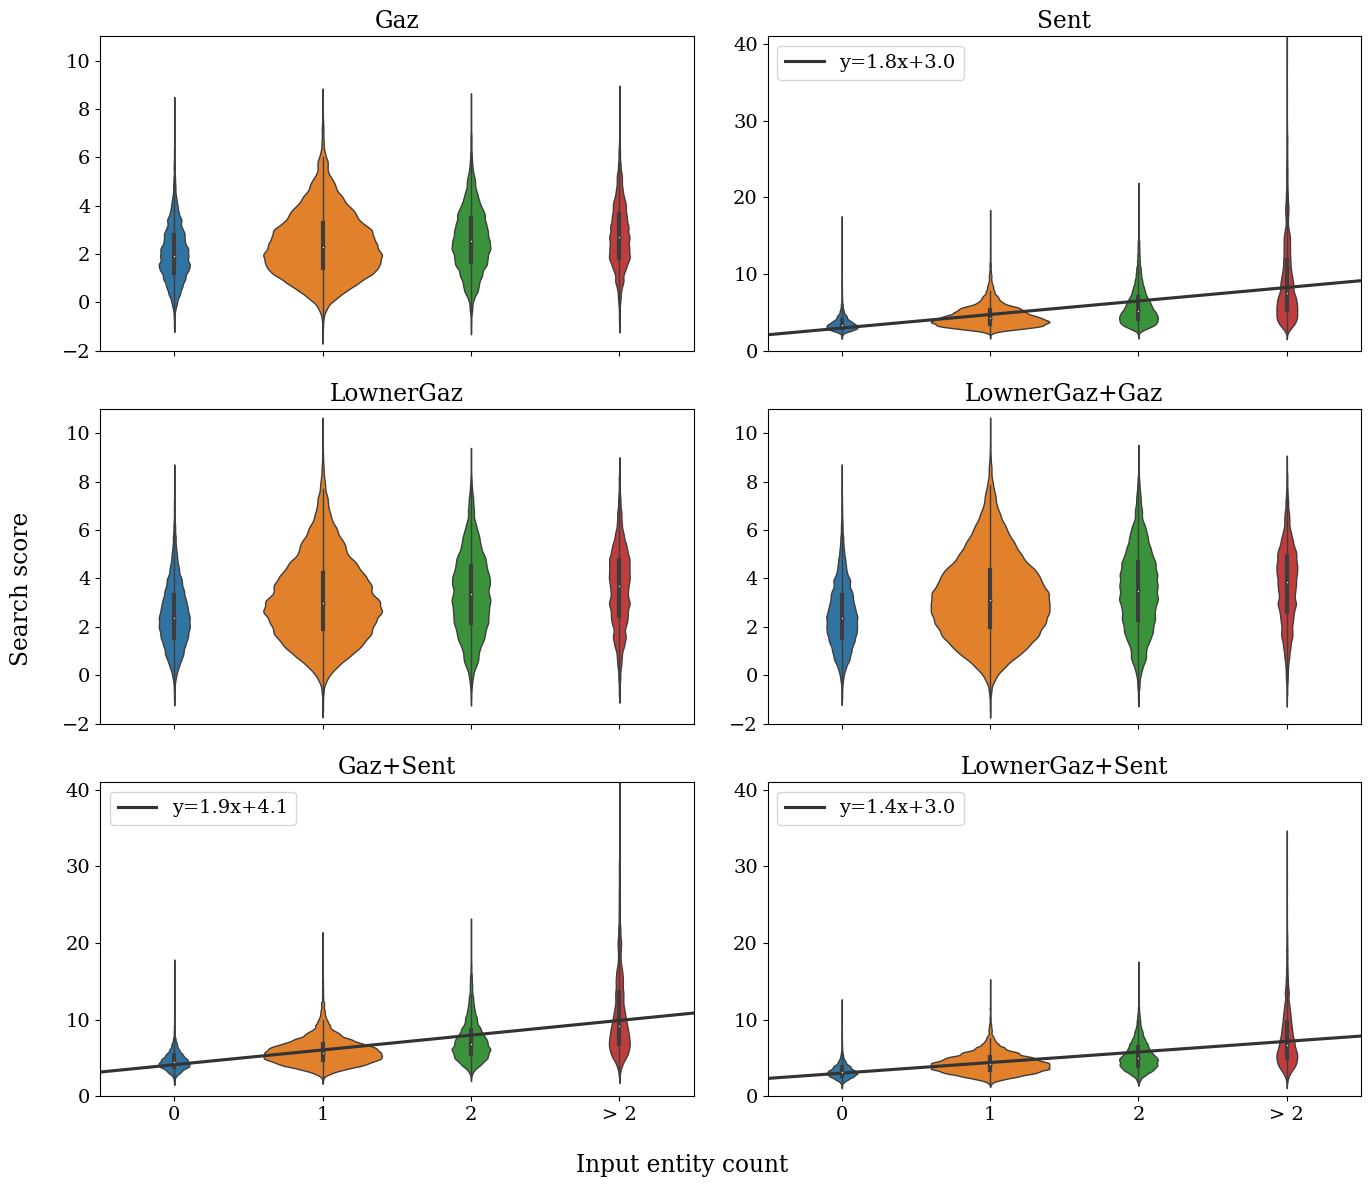

In [ ]:
import seaborn as sns
from evaluations.utils import MODEL_ORDER, PLOT_MODEL_NAMES
import matplotlib.pyplot as plt
from scipy import stats

plot_model_names = {
    "t5_asp_gaz": "Gaz",
    "t5_asp_sent": "Sent",
    "t5_asp_lownergaz": "LownerGaz",
    "t5_asp_lownergaz_gaz": "LownerGaz+Gaz",
    "t5_asp_gaz_sent": "Gaz+Sent",
    "t5_asp_lownergaz_sent": "LownerGaz+Sent",
}
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(14, 12))

fig.supxlabel("Input entity count")
fig.supylabel("Search score")

positions = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
    (2, 0),
    (2, 1)
]


for idx, model in enumerate(sorted(plot_model_names.keys(), key=lambda x: MODEL_ORDER.get(x, 1000))):
    is_left = positions[idx][1] == 0
    if model.endswith("gaz"):
        ylimit = (-2, 11)
    else:
        ylimit = (0, 41)
    order = [
        "0",
        "1",
        "2",
        "> 2",
    ]
    sns.violinplot(comp_df.loc[model, "lowner_test"],
                   y="search score",
                   x="target bin",
                   order=order,
                   inner="box",
                   scale="count",
                   bw=0.08,
                   linewidth=1,
                   gridsize=300,
                   split=True,
                   ax=axs[positions[idx]],
                   zorder=1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        comp_df.loc[model, "lowner_test"]['target bin idx'],
        comp_df.loc[model, "lowner_test"]['search score'])
    if r_value >= 0.3 or r_value <= -0.3:
        sns.regplot(
            comp_df.loc[model, "lowner_test"],
            y="search score",
            x="target bin idx",
            #x_bins="target bin",
            order=1,
            scatter=False,
            truncate=False,
            color=".2",
            ax=axs[positions[idx]],
            label="y={0:.1f}x+{1:.1f}".format(slope, intercept))
        axs[positions[idx]].legend(loc=2)
    axs[positions[idx]].set_ylim(ylimit)
    axs[positions[idx]].set_xlabel("")

    axs[positions[idx]].set_ylabel("")
    axs[positions[idx]].set_title(plot_model_names[model])

plt.tight_layout()
LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance", "violin_corr_input_entity_search_score.png"), dpi=200)


## Hypothesis 1-3 - Linechart T5-ASP F1 per seed

In [ ]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [ ]:
from evaluations.performance_01 import get_per_sample_metrics, aggregate_performance_metrics

performance_metrics = get_per_sample_metrics()
agg_perf_metrics = aggregate_performance_metrics(performance_metrics)
agg_perf_metrics.loc[:, :, "last", "lowner_test"]

fn      fp     tp  precision     recall  \
seed model                                                                     
1    dict_match_gaz               22774   81934  20942  20.356546  47.904657   
     dict_match_gaz_sent          22162   81322  21554  20.951437  49.304602   
     dict_match_lownergaz          7943  264557  35773  11.911231  81.830451   
     dict_match_lownergaz_gaz      7656  264744  36060  11.987873  82.486961   
     dict_match_lownergaz_sent     6513  263601  37203  12.367854  85.101565   
     dict_match_sent              22464   81460  21252  20.690864  48.613780   
     flair_roberta                 6513    7548  37203  83.133338  85.101565   
     search_match_gaz             26851   30203  16865  35.831138  38.578552   
     search_match_gaz_sent        25163   23606  18553  44.007211  42.439839   
     search_match_lownergaz       18824   30498  24892  44.939520  56.940251   
     search_match_lownergaz_gaz   18936   29155  24780  45.944192  56.684052   
     search_match_lownergaz_sent  17646   17914  26070  59.271553  59.634916   
     search_match_sent            33071    2893  10645  78.630521  24.350352   
     t5_asp                        6977    5354  36739  87.280545  84.040168   
     t5_asp_gaz                    6110    4887  37606  88.499282  86.023424   
     t5_asp_gaz_sent               5360    4561  38356  89.372510  87.739043   
     t5_asp_lownergaz              8906    3713  34810  90.361602  79.627596   
     t5_asp_lownergaz_gaz          8769    3728  34947  90.360698  79.940983   
     t5_asp_lownergaz_sent         5007    3949  38709  90.742651  88.546528   
     t5_asp_sent                   6499    4750  37217  88.681583  85.133590   
2    dict_match_gaz               22777   81937  20939  20.353630  47.897795   
     dict_match_gaz_sent          22198   81358  21518  20.916443  49.222253   
     dict_match_lownergaz          7990  264604  35726  11.895582  81.722939   
     dict_match_lownergaz_gaz      7663  264751  36053  11.985545  82.470949   
     dict_match_lownergaz_sent     6475  263563  37241  12.380487  85.188489   
     dict_match_sent              22470   81466  21246  20.685022  48.600055   
     flair_roberta                 6495    7528  37221  83.177278  85.142740   
     search_match_gaz             26847   30199  16869  35.839636  38.587702   
     search_match_gaz_sent        25170   23613  18546  43.990607  42.423827   
     search_match_lownergaz       18800   30474  24916  44.982849  56.995151   
     search_match_lownergaz_gaz   18980   29199  24736  45.862612  56.583402   
     search_match_lownergaz_sent  17642   17910  26074  59.280648  59.644066   
     search_match_sent            33071    2893  10645  78.630521  24.350352   
     t5_asp                        6956    5504  36760  86.977096  84.088206   
     t5_asp_gaz                    8266    4314  35450  89.150991  81.091591   
     t5_asp_gaz_sent               5480    4409  38236  89.661156  87.464544   
     t5_asp_lownergaz              5527    4023  38189  90.469535  87.357032   
     t5_asp_lownergaz_gaz          8918    3629  34798  90.556119  79.600146   
     t5_asp_lownergaz_sent         5206    3737  38510  91.154401  88.091317   
     t5_asp_sent                   6668    4572  37048  89.014897  84.747003   
3    dict_match_gaz               22767   81927  20949  20.363350  47.920670   
     dict_match_gaz_sent          22132   81292  21584  20.980598  49.373227   
     dict_match_lownergaz          8009  264623  35707  11.889255  81.679477   
     dict_match_lownergaz_gaz      7616  264704  36100  12.001170  82.578461   
     dict_match_lownergaz_sent     6475  263563  37241  12.380487  85.188489   
     dict_match_sent              22456   81452  21260  20.698653  48.632080   
     flair_roberta                 6420    7852  37296  82.608310  85.314301   
     search_match_gaz             26835   30187  16881  35.865131  38.615152   
     search_match_gaz_sent        251

In [ ]:
f1_seed_metrics = agg_perf_metrics.loc[:, :, "last", "lowner_test"].reset_index()
t5_f1_seed_metrics = f1_seed_metrics[
    f1_seed_metrics["model"].str.startswith("t5_asp")
    | f1_seed_metrics["model"].str.startswith("flair")]


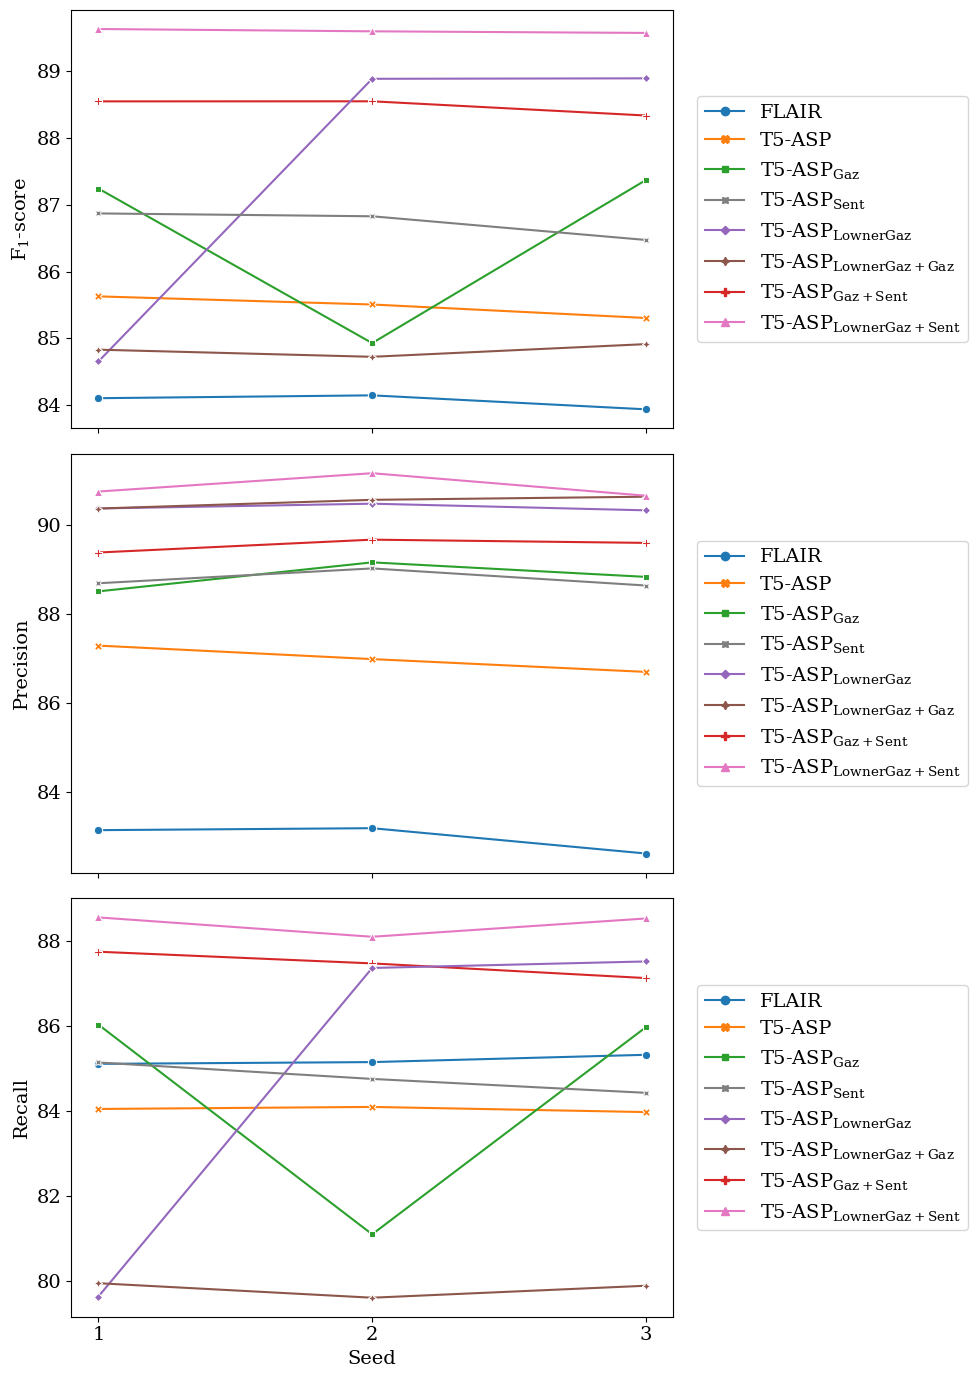

In [ ]:
import seaborn as sns
from evaluations.utils import MODEL_ORDER, PLOT_MODEL_NAMES
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,14), layout="tight")

bbox_to_anchor=(1.7, 0.5)

sns.lineplot(t5_f1_seed_metrics, x="seed", y="f1", hue="model", style="model", dashes=False, markers=True, ax=axs[0])
handles, labels = axs[0].get_legend_handles_labels()
order = [label_idx for _, label_idx in sorted([(MODEL_ORDER[label], idx) for idx, label in enumerate(labels)])]
axs[0].legend([handles[idx] for idx in order],
              [PLOT_MODEL_NAMES[labels[idx]] for idx in order],
              bbox_to_anchor=(1.04, 0.5),
              loc="center left",
              borderaxespad=0)
axs[0].set_ylabel("$F_{1}$-score")
axs[0].set_xlabel("")

sns.lineplot(t5_f1_seed_metrics,
             x="seed",
             y="precision",
             hue="model",
             style="model",
             dashes=False,
             markers=True,
             ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
order = [
    label_idx for _, label_idx in sorted([(MODEL_ORDER[label], idx)
                                          for idx, label in enumerate(labels)])
]
axs[1].legend([handles[idx] for idx in order],
              [PLOT_MODEL_NAMES[labels[idx]] for idx in order],
              bbox_to_anchor=(1.04, 0.5),
              loc="center left",
              borderaxespad=0)
axs[1].set_ylabel("Precision")
axs[1].set_xlabel("")

sns.lineplot(t5_f1_seed_metrics,
             x="seed",
             y="recall",
             hue="model",
             style="model",
             dashes=False,
             markers=True,
             ax=axs[2])
handles, labels = axs[2].get_legend_handles_labels()
order = [
    label_idx for _, label_idx in sorted([(MODEL_ORDER[label], idx)
                                          for idx, label in enumerate(labels)])
]
axs[2].legend([handles[idx] for idx in order],
              [PLOT_MODEL_NAMES[labels[idx]] for idx in order],
              bbox_to_anchor=(1.04, 0.5),
              loc="center left",
              borderaxespad=0)
axs[2].set_ylabel("Recall")
axs[2].set_xlabel("Seed")

LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance",
                         "t5_f1_per_seed.png"),
            bbox_inches="tight",
            dpi=200)


## Gazetteer stats

In [ ]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)


In [ ]:
from evaluations.datasets_00 import get_gazetteer_stats_df

gaz_files = {
    "t5_asp_gaz": [os.path.join(thesis_path, "data", "multiconer",
                                   f"multiconer_gaz.json")],
    "t5_asp_sent": [os.path.join(thesis_path, "data", "multiconer",
                                   f"multiconer_sent.json")],
    "t5_asp_lownergaz": [os.path.join(thesis_path, "data", "mlowner",
                                   "lowner_gazetteer_db.json")],
    "t5_asp_lownergaz_gaz": [os.path.join(thesis_path, "data", "mlowner",
                                   "lownergaz_gaz.json")],
    "t5_asp_gaz_sent": [os.path.join(thesis_path, "data", "multiconer",
                                   f"multiconer_gaz.json"), os.path.join(thesis_path, "data", "multiconer",
                                   f"multiconer_sent.json")],
    "t5_asp_lownergaz_sent": [os.path.join(thesis_path, "data", "multiconer",
                                   f"multiconer_sent.json"), os.path.join(thesis_path, "data", "mlowner",
                                   "lowner_gazetteer_db.json")]
}

gazetteer_stats_df = get_gazetteer_stats_df(gaz_files)
gazetteer_stats_df

,gazetteer,total samples,sample len avg,sample len std,total entities,distinct entities,entity count avg,entity count std,product,group,location,corporation,creative-work,person
0,t5_asp_gaz,176159,2.320330,1.312987,176159,176159,1.000000,0.000000,16051,24513,38653,19161,32239,45542
1,t5_asp_sent,215680,9.959477,7.511505,270306,175720,1.253273,0.659560,36641,40128,58486,37235,42571,55245
2,t5_asp_lownergaz,3773503,2.507399,1.327975,3773503,3539857,1.000000,0.000000,67117,227830,1118002,72106,490555,1797893
3,t5_asp_lownergaz_gaz,3942956,2.500562,1.328185,3942956,3709310,1.000000,0.000000,79116,251835,1156251,90891,521594,1843269
4,t5_asp_gaz_sent,391839,6.525147,6.802388,446465,176159,1.139409,0.505293,52692,64641,97139,56396,74810,100787
5,t5_asp_lownergaz_sent,3989183,2.910305,2.749340,4043809,3708881,1.013694,0.163709,103758,267958,1176488,109341,533126,1853138


In [ ]:
gazetteer_stats_df.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "01_performance_gazetteer_stats.pkl.tar.gz"))

In [ ]:
import pandas as pd

gazetteer_stats_df = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "01_performance_gazetteer_stats.pkl.tar.gz"))
gazetteer_stats_df

,gazetteer,total samples,sample len avg,sample len std,total entities,distinct entities,entity count avg,entity count std,product,group,location,corporation,creative-work,person
0,t5_asp_gaz,176159,2.320330,1.312987,176159,176159,1.000000,0.000000,16051,24513,38653,19161,32239,45542
1,t5_asp_sent,215680,9.959477,7.511505,270306,175720,1.253273,0.659560,36641,40128,58486,37235,42571,55245
2,t5_asp_lownergaz,3773503,2.507399,1.327975,3773503,3539857,1.000000,0.000000,67117,227830,1118002,72106,490555,1797893
3,t5_asp_lownergaz_gaz,3942956,2.500562,1.328185,3942956,3709310,1.000000,0.000000,79116,251835,1156251,90891,521594,1843269
4,t5_asp_gaz_sent,391839,6.525147,6.802388,446465,176159,1.139409,0.505293,52692,64641,97139,56396,74810,100787
5,t5_asp_lownergaz_sent,3989183,2.910305,2.749340,4043809,3708881,1.013694,0.163709,103758,267958,1176488,109341,533126,1853138


In [ ]:
from evaluations.utils import get_gazetteer_stats_totals_correct_latex_format

print(get_gazetteer_stats_totals_correct_latex_format(gazetteer_stats_df))


\begin{tabular}{@{}llS[table-format = 7]S[table-format = 2.2 (2)]S[table-format = 7]S[table-format = 2.2 (2)]S[table-format = 7]@{}}
\toprule
{} & {Total samples} & {Sample length} & {Total entities} & {Entity count} & {Distinct entities} \\
{Gazetteer} & {} & {} & {} & {} & {} \\
\midrule
Gaz & 176159 & 2.32 (131) & 176159 & 1.00 (0) & 176159 \\
Sent & 215680 & 9.96 (751) & 270306 & 1.25 (66) & 175720 \\
LownerGaz & 3773503 & 2.51 (133) & 3773503 & 1.00 (0) & 3539857 \\
LownerGaz+Gaz & 3942956 & 2.50 (133) & 3942956 & 1.00 (0) & 3709310 \\
Gaz+Sent & 391839 & 6.53 (680) & 446465 & 1.14 (51) & 176159 \\
LownerGaz+Sent & 3989183 & 2.91 (275) & 4043809 & 1.01 (16) & 3708881 \\
\bottomrule
\end{tabular}



/home/loebbert/projects/thesis/evaluations/utils.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df["Gazetteer"] = major_df["gazetteer"].apply(
/home/loebbert/projects/thesis/evaluations/utils.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df["Total samples"] = major_df["total samples"].copy(deep=True)
/home/loebbert/projects/thesis/evaluations/utils.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [ ]:
from evaluations.utils import get_gazetteer_stats_entity_types_correct_latex_format

print(get_gazetteer_stats_entity_types_correct_latex_format(gazetteer_stats_df))

\begin{tabular}{@{}lSSSSSS@{}}
\toprule
{} & {Person} & {Location} & {Group} & {Corporation} & {Creative Work} & {Product} \\
{Gazetteer} & {} & {} & {} & {} & {} & {} \\
\midrule
Gaz & 45542 & 38653 & 24513 & 19161 & 32239 & 16051 \\
Sent & 55245 & 58486 & 40128 & 37235 & 42571 & 36641 \\
LownerGaz & 1797893 & 1118002 & 227830 & 72106 & 490555 & 67117 \\
LownerGaz+Gaz & 1843269 & 1156251 & 251835 & 90891 & 521594 & 79116 \\
Gaz+Sent & 100787 & 97139 & 64641 & 56396 & 74810 & 52692 \\
LownerGaz+Sent & 1853138 & 1176488 & 267958 & 109341 & 533126 & 103758 \\
\bottomrule
\end{tabular}



/home/loebbert/projects/thesis/evaluations/utils.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df["Gazetteer"] = type_df["gazetteer"].apply(
/home/loebbert/projects/thesis/evaluations/utils.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df[entity_name] = type_df[entity_type]
/home/loebbert/projects/thesis/evaluations/utils.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
import pickle
from statistics import mean

with open("/home/loebbert/projects/thesis/experiments/01_performance/data/01_search_results/t5_asp_sent/lowner_train.pkl", "rb") as file:
    search_results = pickle.load(file)

mean([len(v) for v in search_results.values()])

6

## Hyperparameter configs

In [ ]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)


In [ ]:
from configs.asp_t5 import T5_ASP, T5_ASP_GAZ, T5_ASP_GAZ_SENT, T5_ASP_LOWNERGAZ, T5_ASP_LOWNERGAZ_SENT, T5_ASP_LOWNERGAZ_GAZ, T5_ASP_SENT
import pandas as pd
from evaluations.utils import LATEX_MODEL_NAMES

flair_config = {
    "num_epochs": 20,
    "plm_pretrained_name_or_path": "xlm-roberta-large",
    "plm_learning_rate": 5e-6,
    "task_learning_rate": 5e-6,
    "batch_size": 40,
    "optimizer": "AdamW",
    "scheduler": "OneCycleLR",
    "adam_weight_decay": 0.,
    "hidden_dim": 256,
    "warmup_ratio": 0.,
    "subtoken_pooling": "first",
    "name": "flair_roberta"
}

t5_configs = [T5_ASP, T5_ASP_GAZ, T5_ASP_SENT, T5_ASP_GAZ_SENT, T5_ASP_LOWNERGAZ, T5_ASP_LOWNERGAZ_GAZ, T5_ASP_LOWNERGAZ_SENT]
for config in t5_configs:
    config.update({"optimizer": "AdamW", "scheduler": "linear_with_warmup"})
    config["hidden_dim"] = config["asp_hidden_dim"]

configs = pd.DataFrame.from_records([flair_config, *t5_configs])
configs["scheduler"] = configs["scheduler"].map(lambda x:
    {"linear_with_warmup": "LinearWithWarmup"}.get(x, x))
configs = configs.set_index(
    "name").dropna(axis=1).swapaxes(0, 1)
configs.columns = configs.columns.map(lambda x: LATEX_MODEL_NAMES.get(x, "name"))


configs.rename(
    {
        "num_epochs": "Epochs",
        "plm_pretrained_name_or_path": "PLM",
        "plm_learning_rate": "PLM LR",
        "task_learning_rate": "Task LR",
        "batch_size": "Batch size",
        "optimizer": "Optimizer",
        "scheduler": "Scheduler",
        "adam_weight_decay": "Weight decay",
        "warmup_ratio": "Warmup ratio",
        "hidden_dim": "Hidden dims",
        "name": "Name"
    },
    axis=0, inplace=True)

print(configs[configs.columns[4:]].style.to_latex(siunitx=True,
                                      hrules=True,
                                      multirow_align="t",
                                      column_format="@{}*9{l}@{}"))

\begin{tabular}{@{}*9{l}@{}}
\toprule
{name} & {T5-ASP\textsubscript{Gaz+Sent}} & {T5-ASP\textsubscript{LownerGaz}} & {T5-ASP\textsubscript{LownerGaz+Gaz}} & {T5-ASP\textsubscript{LownerGaz+Sent}} \\
\midrule
Epochs & 24 & 17 & 17 & 16 \\
PLM & t5-base & t5-base & t5-base & t5-base \\
PLM LR & 0.000175 & 0.000209 & 0.000209 & 0.000175 \\
Task LR & 0.003585 & 0.003949 & 0.003949 & 0.003585 \\
Batch size & 40 & 40 & 40 & 40 \\
Optimizer & AdamW & AdamW & AdamW & AdamW \\
Scheduler & LinearWithWarmup & LinearWithWarmup & LinearWithWarmup & LinearWithWarmup \\
Weight decay & 0.011739 & 0.018863 & 0.018863 & 0.011739 \\
Hidden dims & 633 & 799 & 799 & 633 \\
Warmup ratio & 0.379178 & 0.208649 & 0.208649 & 0.379178 \\
\bottomrule
\end{tabular}



In [ ]:
from configs.asp_t5 import T5_ASP, T5_ASP_GAZ, T5_ASP_GAZ_SENT, T5_ASP_LOWNERGAZ, T5_ASP_LOWNERGAZ_SENT, T5_ASP_LOWNERGAZ_GAZ, T5_ASP_SENT
import pandas as pd
from evaluations.utils import PLOT_SEARCH_NAMES, MODEL_ORDER


def index_order(x: pd.Index):
    if x.name == "name":
        return x.map(lambda x: MODEL_ORDER.get(x, 1000))
    return x

gaz_configs = pd.DataFrame.from_records([T5_ASP_GAZ, T5_ASP_LOWNERGAZ, T5_ASP_LOWNERGAZ_GAZ]).rename({"search_topk": "gaz_search_topk", "search_algorithm": "gaz_search_algorithm", "use_labels":"gaz_use_labels", "use_mentions": "gaz_use_mentions"}, axis=1)
sent_configs = pd.DataFrame.from_records([T5_ASP_SENT]).rename({"search_topk": "sent_search_topk", "search_algorithm": "sent_search_algorithm", "use_labels":"sent_use_labels", "use_mentions": "sent_use_mentions"}, axis=1)
combined_configs = pd.DataFrame.from_records([T5_ASP_GAZ_SENT, T5_ASP_LOWNERGAZ_SENT])

gazetteers = pd.concat([gaz_configs, sent_configs, combined_configs]).set_index("name")[["gaz_search_algorithm", "gaz_search_topk", "sent_search_algorithm", "sent_search_topk", "search_join_method", "search_topk"]]
gazetteers.sort_index(key=index_order, inplace=True)
gazetteers.index = gazetteers.index.map(
    lambda x: PLOT_SEARCH_NAMES.get(x))
#gazetteers.columns.rename(["Gaz Search algorithm", "Gaz Search Top-k", "Sent Search algorithm", "Sent Search Top-k", "Search Join Method", "Search Top-k"], inplace=True)
print(gazetteers.style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{} *7{l} @{}"
))

\begin{tabular}{@{} *7{l} @{}}
\toprule
{} & {gaz_search_algorithm} & {gaz_search_topk} & {sent_search_algorithm} & {sent_search_topk} & {search_join_method} & {search_topk} \\
{name} & {} & {} & {} & {} & {} & {} \\
\midrule
Gaz & bm25 & 12.000000 & nan & nan & nan & nan \\
Sent & nan & nan & ann & 6.000000 & nan & nan \\
LownerGaz & bm25 & 12.000000 & nan & nan & nan & nan \\
LownerGaz+Gaz & bm25 & 12.000000 & nan & nan & nan & nan \\
Gaz+Sent & bm25 & 6.000000 & ann & 6.000000 & reciprocal_rank_fusion & 12.000000 \\
LownerGaz+Sent & bm25 & 6.000000 & ann & 6.000000 & reciprocal_rank_fusion & 8.000000 \\
\bottomrule
\end{tabular}



In [ ]:
gaz_configs.rename({"search_topk": "gaz_search_topk", "search_algorithm": "gaz_search_algorithm", "use_labels":"gaz_use_labels", "use_mentions": "gaz_use_mentions"}, axis=1)


,plm_pretrained_name_or_path,plm_tokenizer_name,model_max_length,mention_start_token,mention_end_token,asp_hidden_dim,asp_dropout_rate,asp_init_std,asp_activation,num_labels,...,gradient_accumulation_steps,batch_size,train_len,fused,gaz_search_algorithm,gaz_search_topk,train_search_dropout,gaz_use_labels,gaz_use_mentions,name
0,t5-base,t5-small,4096,<m>,</m>,799,0.43875,0.02,relu,6,...,1,40,0,None,bm25,12,0.028261,True,True,t5_asp_gaz
1,t5-base,t5-small,4096,<m>,</m>,799,0.43875,0.02,relu,6,...,1,40,0,None,bm25,12,0.028261,True,True,t5_asp_lownergaz
2,t5-base,t5-small,4096,<m>,</m>,799,0.43875,0.02,relu,6,...,1,40,0,None,bm25,12,0.028261,True,True,t5_asp_lownergaz_gaz


In [ ]:

configs = pd.DataFrame.from_records(gaz_configs)

configs = configs.set_index(
    "name").dropna(axis=1).swapaxes(0, 1)
configs.columns = configs.columns.map(lambda x: LATEX_MODEL_NAMES.get(x, "name"))


configs.rename(
    {
        "num_epochs": "Epochs",
        "plm_pretrained_name_or_path": "PLM",
        "plm_learning_rate": "PLM LR",
        "task_learning_rate": "Task LR",
        "batch_size": "Batch size",
        "optimizer": "Optimizer",
        "scheduler": "Scheduler",
        "adam_weight_decay": "Weight decay",
        "warmup_ratio": "Warmup ratio",
        "hidden_dim": "Hidden dims",
        "name": "Name"
    },
    axis=0, inplace=True)

print(configs[configs.columns[4:]].style.to_latex(siunitx=True,
                                      hrules=True,
                                      multirow_align="t",
                                      column_format="@{}*9{l}@{}"))